In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)



In [ ]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [ ]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

In [ ]:
test['trans_date_trans_time'].head(10)

0   2020-06-21 12:14:25
1   2020-06-21 12:14:33
2   2020-06-21 12:14:53
3   2020-06-21 12:15:15
4   2020-06-21 12:15:17
5   2020-06-21 12:15:37
6   2020-06-21 12:15:44
7   2020-06-21 12:15:50
8   2020-06-21 12:16:10
9   2020-06-21 12:16:11
Name: trans_date_trans_time, dtype: datetime64[ns]

In [ ]:
train['trans_date_trans_time'].head(10)

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06
5   2019-01-01 00:04:08
6   2019-01-01 00:04:42
7   2019-01-01 00:05:08
8   2019-01-01 00:05:18
9   2019-01-01 00:06:01
Name: trans_date_trans_time, dtype: datetime64[ns]

In [ ]:
print(test['trans_date_trans_time'][1].day_name())
print(train['trans_date_trans_time'][1].day_name())

Sunday
Tuesday


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [ ]:
for i in test.columns:
    print(i)
    print(test[test[i] == ' '].index)
    
for i in train.columns:
    print(i)
    print(train[train[i] == ' '].index)

Unnamed: 0
Int64Index([], dtype='int64')
trans_date_trans_time
Int64Index([], dtype='int64')
cc_num
Int64Index([], dtype='int64')
merchant
Int64Index([], dtype='int64')
category
Int64Index([], dtype='int64')
amt
Int64Index([], dtype='int64')
first
Int64Index([], dtype='int64')
last
Int64Index([], dtype='int64')
gender
Int64Index([], dtype='int64')
street
Int64Index([], dtype='int64')
city
Int64Index([], dtype='int64')
state
Int64Index([], dtype='int64')
zip
Int64Index([], dtype='int64')
lat
Int64Index([], dtype='int64')
long
Int64Index([], dtype='int64')
city_pop
Int64Index([], dtype='int64')
job
Int64Index([], dtype='int64')
dob
Int64Index([], dtype='int64')
trans_num
Int64Index([], dtype='int64')
unix_time
Int64Index([], dtype='int64')
merch_lat
Int64Index([], dtype='int64')
merch_long
Int64Index([], dtype='int64')
is_fraud
Int64Index([], dtype='int64')
Unnamed: 0
Int64Index([], dtype='int64')
trans_date_trans_time
Int64Index([], dtype='int64')
cc_num
Int64Index([], dtype='int64')
me

In [ ]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test['dob'].head(20)

0     1968-03-19
1     1990-01-17
2     1970-10-21
3     1987-07-25
4     1955-07-06
5     1991-10-13
6     1951-01-15
7     1972-03-05
8     1973-05-27
9     1956-05-30
10    1996-04-10
11    1976-02-26
12    1977-01-04
13    1937-03-17
14    1971-11-02
15    1988-04-09
16    1987-02-13
17    1992-07-24
18    1977-12-16
19    1997-09-22
Name: dob, dtype: object

In [ ]:
test['dob'] = pd.to_datetime(test['dob'], format='%Y-%m-%d')
train['dob'] = pd.to_datetime(train['dob'], format='%Y-%m-%d')

In [ ]:
s = (test.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

s = (test.dtypes == 'int64')
t = (test.dtypes == 'float64')


# print (s)
intype = list(s[s].index)
floatype = list(t[t].index)

# print (s[s])
# print (s[s].index)

intype.extend(floatype)

print("Numerical variables in the dataset:", intype)

Categorical variables in the dataset: ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']
Numerical variables in the dataset: ['Unnamed: 0', 'cc_num', 'zip', 'city_pop', 'unix_time', 'is_fraud', 'amt', 'lat', 'long', 'merch_lat', 'merch_long']


In [ ]:
test[intype].head()

,Unnamed: 0,cc_num,zip,city_pop,unix_time,is_fraud,amt,lat,long,merch_lat,merch_long
0,0,2291163933867244,29209,333497,1371816865,0,2.86,33.9659,-80.9355,33.986391,-81.200714
1,1,3573030041201292,84002,302,1371816873,0,29.84,40.3207,-110.4360,39.450498,-109.960431
2,2,3598215285024754,11710,34496,1371816893,0,41.28,40.6729,-73.5365,40.495810,-74.196111
3,3,3591919803438423,32780,54767,1371816915,0,60.05,28.5697,-80.8191,28.812398,-80.883061
4,4,3526826139003047,49632,1126,1371816917,0,3.19,44.2529,-85.0170,44.959148,-85.884734


In [ ]:
test[object_cols].head()

,merchant,category,first,last,gender,street,city,state,job,trans_num
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b


In [ ]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [ ]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [ ]:
total.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
def viz(var):
    subset=total[total['is_fraud']==1]
    subset[var].value_counts().sort_values(ascending=False).plot.barh()
    plt.title("Fraud Transaction based on " + var)
    plt.show()
    
    fraud=subset.groupby([var]).size()

    (((fraud/total.groupby([var]).size())*100).sort_values(ascending=False)).plot.barh()
    plt.title("Percentage of Fraud transaction out of total transaction based on "+ var)
    plt.show()
    
def bigviz(var,num):
    subset=total[total['is_fraud']==1]
    subset[var].value_counts().head(num).sort_values(ascending=False).plot.barh()
    plt.title("Fraud Transaction based on " + var)
    plt.show()
    
    fraud=subset.groupby([var]).size()

    (((fraud/total.groupby([var]).size())*100).head(num).sort_values(ascending=False)).plot.barh()
    plt.title("Percentage of Fraud transaction out of total transaction based on "+ var)
    plt.show()

In [ ]:
subset=total[total['is_fraud']==1]

fraud=subset.groupby(['category']).size()

In [ ]:
((fraud/total.groupby(['category']).size())*100).sort_values(ascending=False)

category
shopping_net      1.592713
misc_net          1.303859
grocery_pos       1.264537
shopping_pos      0.634375
gas_transport     0.410575
misc_pos          0.281890
grocery_net       0.269737
travel            0.269170
personal_care     0.222931
entertainment     0.217719
kids_pets         0.187971
food_dining       0.156813
home              0.151032
health_fitness    0.150955
dtype: float64

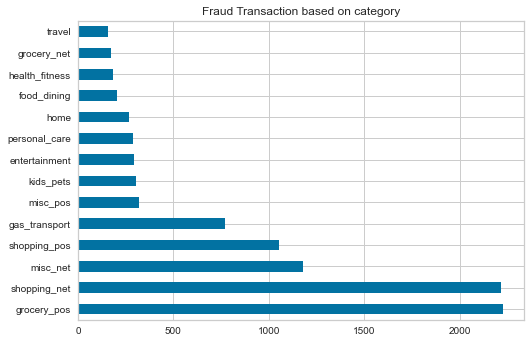

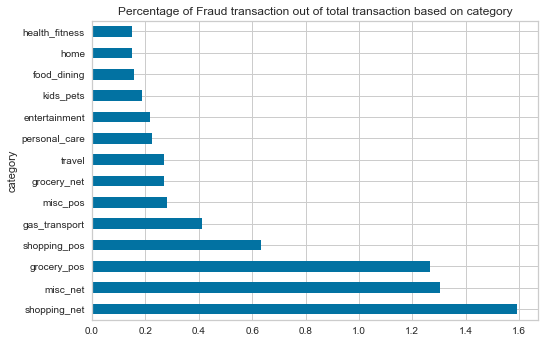

In [ ]:
# subset=total[total['is_fraud']==1]
# subset["category"].value_counts().sort_values(ascending=False).plot.barh()
# plt.title("Fraud Transaction")
# plt.show()

# (((fraud/total.groupby(['category']).size())*100).sort_values(ascending=False)).plot.barh()
# plt.title("Percentage of Fraud transaction out of total transaction based on category")
# plt.show()

viz('category')

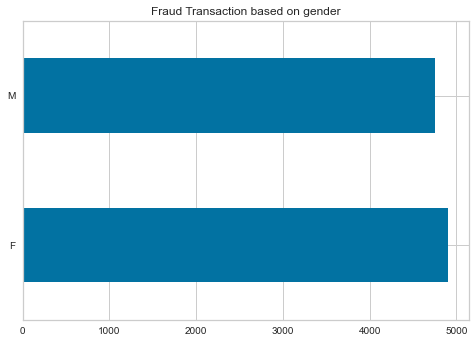

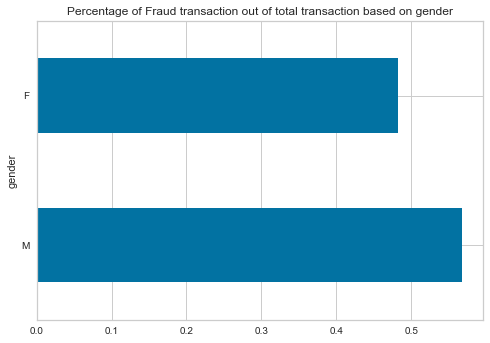

In [ ]:
viz('gender')

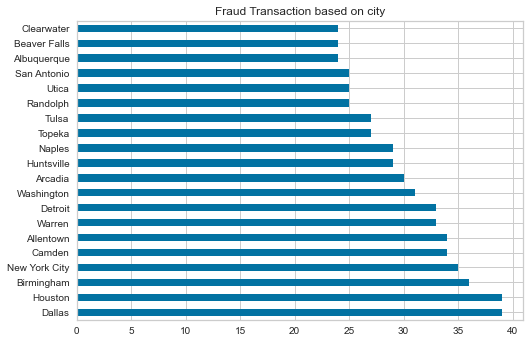

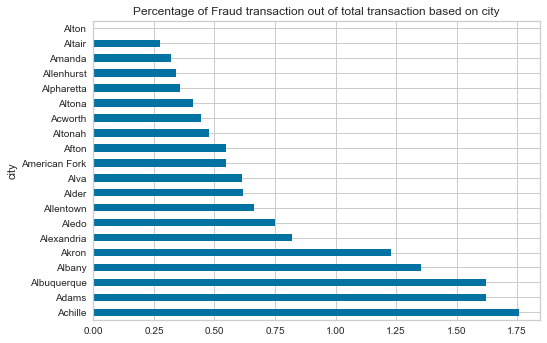

In [ ]:
bigviz('city',20)

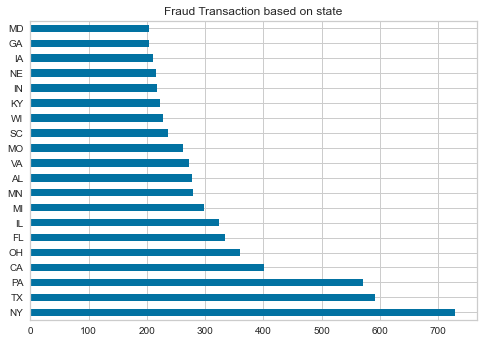

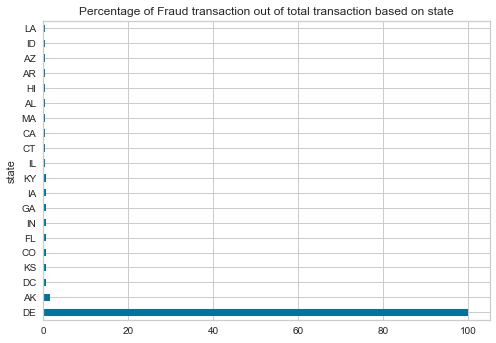

In [ ]:
bigviz('state',20)

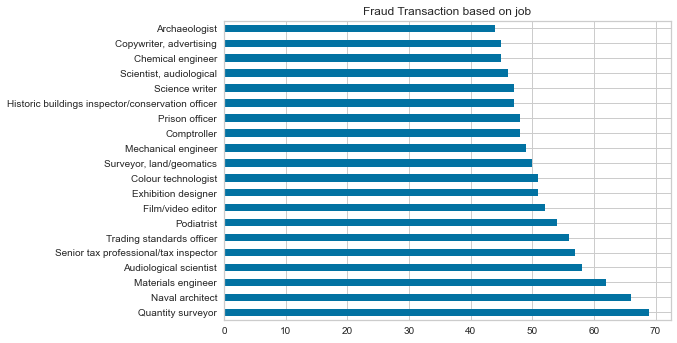

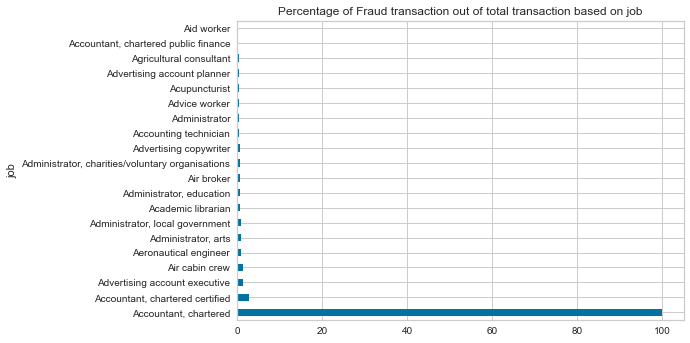

In [ ]:
bigviz('job',20)

In [ ]:
s = (test.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

s = (test.dtypes == 'int64')
t = (test.dtypes == 'float64')


# print (s)
intype = list(s[s].index)
floatype = list(t[t].index)

# print (s[s])
# print (s[s].index)

intype.extend(floatype)

print("Numerical variables in the dataset:", intype)

Categorical variables in the dataset: ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']
Numerical variables in the dataset: ['cc_num', 'zip', 'city_pop', 'unix_time', 'is_fraud', 'amt', 'lat', 'long', 'merch_lat', 'merch_long']


In [ ]:
ds = total.copy()
# creating a subset of dataframe by dropping the redundant features
cols_del = ['cc_num', 'zip', 'lat', 'unix_time','long', 'merch_lat', 'merch_long', 'trans_num']
ds = ds.drop(cols_del, axis=1)
ds.head(10)

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,dob,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,333497,Mechanical engineer,1968-03-19,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,302,"Sales professional, IT",1990-01-17,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,34496,"Librarian, public",1970-10-21,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,54767,Set designer,1987-07-25,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,1126,Furniture designer,1955-07-06,0
5,2020-06-21 12:15:37,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,520,Psychotherapist,1991-10-13,0
6,2020-06-21 12:15:44,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,1139,"Therapist, occupational",1951-01-15,0
7,2020-06-21 12:15:50,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,343,"Development worker, international aid",1972-03-05,0
8,2020-06-21 12:16:10,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,PA,3688,Advice worker,1973-05-27,0
9,2020-06-21 12:16:11,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,263,Barrister,1956-05-30,0


In [ ]:
ds.is_fraud=ds.is_fraud.astype(bool)

In [ ]:
ds.info()
ds.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   first                  object        
 5   last                   object        
 6   gender                 object        
 7   street                 object        
 8   city                   object        
 9   state                  object        
 10  city_pop               int64         
 11  job                    object        
 12  dob                    datetime64[ns]
 13  is_fraud               bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 199.6+ MB


,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,dob,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,333497,Mechanical engineer,1968-03-19,False
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,302,"Sales professional, IT",1990-01-17,False
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,34496,"Librarian, public",1970-10-21,False
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,54767,Set designer,1987-07-25,False
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,1126,Furniture designer,1955-07-06,False
5,2020-06-21 12:15:37,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,520,Psychotherapist,1991-10-13,False
6,2020-06-21 12:15:44,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,1139,"Therapist, occupational",1951-01-15,False
7,2020-06-21 12:15:50,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,343,"Development worker, international aid",1972-03-05,False
8,2020-06-21 12:16:10,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,PA,3688,Advice worker,1973-05-27,False
9,2020-06-21 12:16:11,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,263,Barrister,1956-05-30,False


In [ ]:
ds["age"] = ds["trans_date_trans_time"]-ds["dob"]
ds["age"]=ds["age"].astype('timedelta64[Y]')
ds["age"].head()

0    52.0
1    30.0
2    49.0
3    32.0
4    64.0
Name: age, dtype: float64

In [ ]:
ds['day']=ds["trans_date_trans_time"].dt.dayofweek
ds['month']=ds["trans_date_trans_time"].dt.month
ds['year']=ds["trans_date_trans_time"].dt.year
ds['dayofyear']=ds["trans_date_trans_time"].dt.dayofyear

In [ ]:
def viz_newds(var):
    subset=ds[ds['is_fraud']==1]
    subset[var].value_counts().sort_values(ascending=False).plot.barh()
    plt.title("Fraud Transaction based on " + var)
    plt.show()
    
    fraud=subset.groupby([var]).size()

    (((fraud/ds.groupby([var]).size())*100).sort_values(ascending=False)).plot.barh()
    plt.title("Percentage of Fraud transaction out of total transaction based on "+ var)
    plt.show()
    
def bigviz_newds(var,num):
    subset=ds[ds['is_fraud']==1]
    subset[var].value_counts().head(num).sort_values(ascending=False).plot.barh()
    plt.title("Fraud Transaction based on " + var)
    plt.show()
    
    fraud=subset.groupby([var]).size()

    (((fraud/ds.groupby([var]).size())*100).head(num).sort_values(ascending=False)).plot.barh()
    plt.title("Percentage of Fraud transaction out of total transaction based on "+ var)
    plt.show()

In [ ]:
ds.head(10)

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,dob,is_fraud,age,day,month,year,dayofyear
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,333497,Mechanical engineer,1968-03-19,False,52.0,6,6,2020,173
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,302,"Sales professional, IT",1990-01-17,False,30.0,6,6,2020,173
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,34496,"Librarian, public",1970-10-21,False,49.0,6,6,2020,173
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,54767,Set designer,1987-07-25,False,32.0,6,6,2020,173
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,1126,Furniture designer,1955-07-06,False,64.0,6,6,2020,173
5,2020-06-21 12:15:37,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,NY,520,Psychotherapist,1991-10-13,False,28.0,6,6,2020,173
6,2020-06-21 12:15:44,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,1139,"Therapist, occupational",1951-01-15,False,69.0,6,6,2020,173
7,2020-06-21 12:15:50,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,SD,343,"Development worker, international aid",1972-03-05,False,48.0,6,6,2020,173
8,2020-06-21 12:16:10,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,PA,3688,Advice worker,1973-05-27,False,47.0,6,6,2020,173
9,2020-06-21 12:16:11,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,TX,263,Barrister,1956-05-30,False,64.0,6,6,2020,173


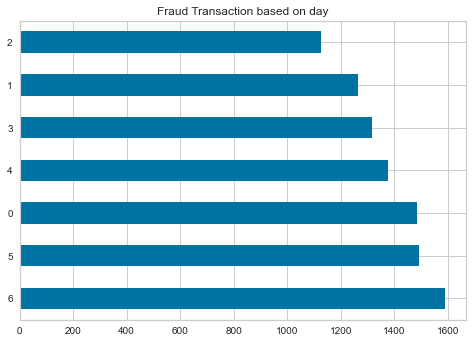

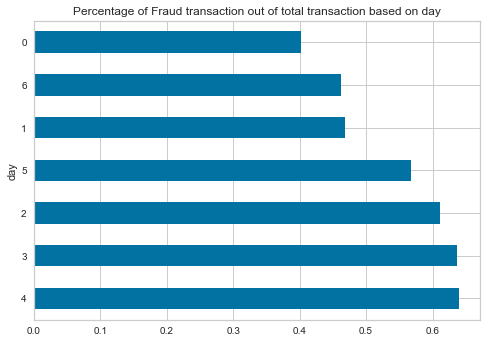

In [ ]:
viz_newds('day')

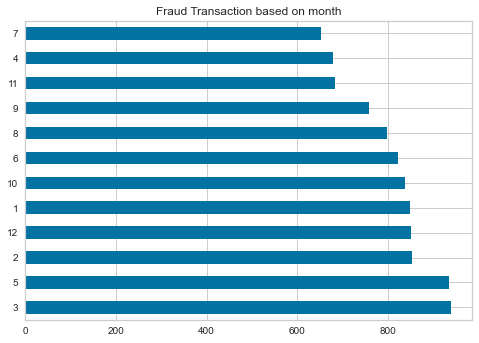

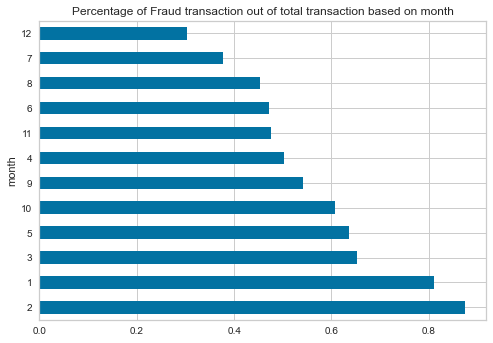

In [ ]:
viz_newds('month')

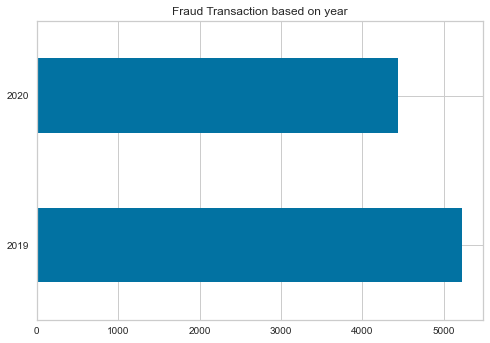

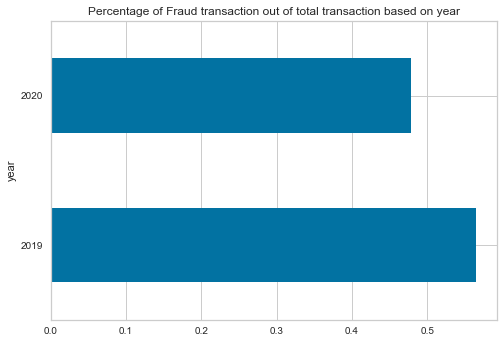

In [ ]:
viz_newds('year')

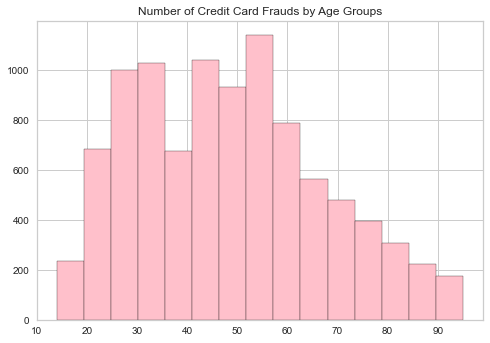

In [ ]:
fraud=ds[ds["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 15, color='pink')
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

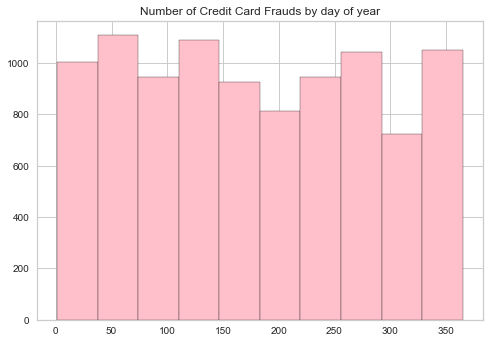

In [ ]:
fraud=ds[ds["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.dayofyear, edgecolor = "black", bins = 10, color='pink')
plt.title("Number of Credit Card Frauds by day of year")
plt.show()

In [ ]:
cols_del = ['first', 'last', 'street']
ds = ds.drop(cols_del, axis=1)

In [ ]:
s = (ds.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    ds[i]=ds[[i]].apply(LE.fit_transform)
    
print("All features are now numerical!")

Categorical variables in the dataset: ['merchant', 'category', 'gender', 'city', 'state', 'job']
All features are now numerical!


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               int32         
 2   category               int32         
 3   amt                    float64       
 4   gender                 int32         
 5   city                   int32         
 6   state                  int32         
 7   city_pop               int64         
 8   job                    int32         
 9   dob                    datetime64[ns]
 10  is_fraud               bool          
 11  age                    float64       
 12  day                    int64         
 13  month                  int64         
 14  year                   int64         
 15  dayofyear              int64         
dtypes: bool(1), datetime64[ns](2), float64(2), int32(6), int64(5)
memory usage: 185.5 MB


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
cols_del = ['trans_date_trans_time', 'dob', 'is_fraud']
X = ds.copy().drop(cols_del, axis=1)
print(X)
y = ds['is_fraud']
print(y)

         merchant  category     amt  gender  city  state  city_pop  job   age  \
0             319        10    2.86       1   168     40    333497  288  52.0   
1             591        10   29.84       0    16     44       302  406  30.0   
2             611         5   41.28       0    64     34     34496  272  49.0   
3             222         9   60.05       1   814      9     54767  422  32.0   
4             292        13    3.19       1   262     22      1126  205  64.0   
...           ...       ...     ...     ...   ...    ...       ...  ...   ...   
1296670       499         0   15.56       1   333     44       258  216  58.0   
1296671         2         1   51.70       1   824     20       100  362  40.0   
1296672       599         1  105.93       1   349     32       899  309  52.0   
1296673       509         1   74.90       1   477     41      1126  488  39.0   
1296674       370         1    4.30       1   793     26       218  470  24.0   

         day  month  year  

In [ ]:
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, y)
fit.scores_

array([3.92816436e+01, 1.69212351e+03, 2.93759870e+07, 3.46508117e+01,
       3.47273512e+02, 9.08608271e-01, 2.00867876e+05, 2.81339795e+02,
       1.38870295e+03, 6.27519311e+01, 8.18888781e+02, 8.31499642e-03,
       2.68113598e+04])

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([3.92816436e+01, 1.69212351e+03, 2.93759870e+07, 3.46508117e+01,
       3.47273512e+02, 9.08608271e-01, 2.00867876e+05, 2.81339795e+02,
       1.38870295e+03, 6.27519311e+01, 8.18888781e+02, 8.31499642e-03,
       2.68113598e+04])

In [ ]:
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, y)
fit.scores_

array([3.92816436e+01, 1.69212351e+03, 2.93759870e+07, 3.46508117e+01,
       3.47273512e+02, 9.08608271e-01, 2.00867876e+05, 2.81339795e+02,
       1.38870295e+03, 6.27519311e+01, 8.18888781e+02, 8.31499642e-03,
       2.68113598e+04])

In [ ]:
import scipy.stats
from scipy.stats import chi2

In [ ]:
col_critical=[]
col_alpha=[]

icol = []
icol_alpha = []
icol_p_value = []
icol_chi_square_statistic = []
icol_critical_value = []
icol_df = []

def chisq(var):
    icol.append(var)
    
    contingency_table=pd.crosstab(ds[var],ds["is_fraud"])
#     print('contingency_table :-\n',contingency_table, '\n')

    #Observed Values
    Observed_Values = contingency_table.values 
#     print("Observed Values :-\n",Observed_Values, '\n')

    #Expected Values
    b=scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
#     print("Expected Values :-\n",Expected_Values, '\n')

    #Degree of Freedom
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)
    # print("Degree of Freedom:-",df)

    #Significance Level 5%
    alpha=0.05

    #chi-square statistic - χ2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    # print("chi-square statistic:-",chi_square_statistic)

    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=df)
    # print('critical_value:',critical_value)

    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    # print('p-value:',p_value)
    
    print('var : '+var)

    print('Significance level: ',alpha)
    print('p-value:',p_value, '\n')
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value, '\n')
    print('Degree of Freedom: ',df)
    
    icol_alpha.append(alpha)
    icol_p_value.append(p_value)
    icol_chi_square_statistic.append(chi_square_statistic)
    icol_critical_value.append(critical_value)
    icol_df.append(df)

    #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    print('Conclusion for '+var+' variable')
    if chi_square_statistic >= critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
        col_critical.append(var)
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value <= alpha:
        print("Reject H0,There is a relationship between 2 categorical variables \n")
        col_alpha.append(var)
    else:
        print("Retain H0,There is no relationship between 2 categorical variables \n")

In [ ]:
icol = []
for i in ds.columns:
    if (i!='is_fraud'):
        
        chisq(i)
        
print(col_critical)
print(col_alpha)

# dictionary with list object in values
details = {
    'var' : icol,
    'alpha' : icol_alpha,
    'pvalue' : icol_p_value,
    'chi_square_statistic' : icol_chi_square_statistic,
    'critical_value' : icol_critical_value,
    'degreefreedom' : icol_df
}
  
# creating a Dataframe object 
feature = pd.DataFrame(details)
  
feature

var : trans_date_trans_time
Significance level:  0.05
p-value: 0.0 

chi-square statistic: 1822005.4342736457
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for trans_date_trans_time variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : merchant
Significance level:  0.05
p-value: 0.0 

chi-square statistic: 8761.093873779402
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for merchant variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : category
Significance level:  0.05
p-value: 0.0 

chi-square statistic: 8329.139945520074
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for category variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : amt


,var,alpha,pvalue,chi_square_statistic,critical_value,degreefreedom
0,trans_date_trans_time,0.05,0.000000e+00,1.822005e+06,3.841459,1
1,merchant,0.05,0.000000e+00,8.761094e+03,3.841459,1
2,category,0.05,0.000000e+00,8.329140e+03,3.841459,1
3,amt,0.05,0.000000e+00,1.121942e+06,3.841459,1
4,gender,0.05,1.776357e-15,6.325402e+01,3.841459,1
5,city,0.05,0.000000e+00,1.395909e+05,3.841459,1
6,state,0.05,0.000000e+00,2.022123e+03,3.841459,1
7,city_pop,0.05,0.000000e+00,1.374106e+05,3.841459,1
8,job,0.05,0.000000e+00,4.807323e+04,3.841459,1
9,dob,0.05,0.000000e+00,1.745737e+05,3.841459,1


In [ ]:
feature

,var,alpha,pvalue,chi_square_statistic,critical_value,degreefreedom
0,trans_date_trans_time,0.05,0.000000e+00,1.822005e+06,3.841459,1
1,merchant,0.05,0.000000e+00,8.761094e+03,3.841459,1
2,category,0.05,0.000000e+00,8.329140e+03,3.841459,1
3,amt,0.05,0.000000e+00,1.121942e+06,3.841459,1
4,gender,0.05,1.776357e-15,6.325402e+01,3.841459,1
5,city,0.05,0.000000e+00,1.395909e+05,3.841459,1
6,state,0.05,0.000000e+00,2.022123e+03,3.841459,1
7,city_pop,0.05,0.000000e+00,1.374106e+05,3.841459,1
8,job,0.05,0.000000e+00,4.807323e+04,3.841459,1
9,dob,0.05,0.000000e+00,1.745737e+05,3.841459,1


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               int32         
 2   category               int32         
 3   amt                    float64       
 4   gender                 int32         
 5   city                   int32         
 6   state                  int32         
 7   city_pop               int64         
 8   job                    int32         
 9   dob                    datetime64[ns]
 10  is_fraud               bool          
 11  age                    float64       
 12  day                    int64         
 13  month                  int64         
 14  year                   int64         
 15  dayofyear              int64         
dtypes: bool(1), datetime64[ns](2), float64(2), int32(6), int64(5)
memory usage: 185.5 MB


In [ ]:
model = pd.get_dummies(ds,columns=['category'],drop_first=True)
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               int32         
 2   amt                    float64       
 3   gender                 int32         
 4   city                   int32         
 5   state                  int32         
 6   city_pop               int64         
 7   job                    int32         
 8   dob                    datetime64[ns]
 9   is_fraud               bool          
 10  age                    float64       
 11  day                    int64         
 12  month                  int64         
 13  year                   int64         
 14  dayofyear              int64         
 15  category_1             uint8         
 16  category_2             uint8         
 17  category_3             uint8         
 18  category_4            

In [ ]:
model.head()

,trans_date_trans_time,merchant,amt,gender,city,state,city_pop,job,dob,is_fraud,...,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13
0,2020-06-21 12:14:25,319,2.86,1,168,40,333497,288,1968-03-19,False,...,0,0,0,0,0,0,1,0,0,0
1,2020-06-21 12:14:33,591,29.84,0,16,44,302,406,1990-01-17,False,...,0,0,0,0,0,0,1,0,0,0
2,2020-06-21 12:14:53,611,41.28,0,64,34,34496,272,1970-10-21,False,...,0,1,0,0,0,0,0,0,0,0
3,2020-06-21 12:15:15,222,60.05,1,814,9,54767,422,1987-07-25,False,...,0,0,0,0,0,1,0,0,0,0
4,2020-06-21 12:15:17,292,3.19,1,262,22,1126,205,1955-07-06,False,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [ ]:
#create two different dataframe of majority and minority class 
df_majority = model[(model['is_fraud']==0)] 
df_minority = model[(model['is_fraud']==1)] 

df_majority.shape,df_minority.shape

((1842743, 28), (9651, 28))

In [ ]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1842743, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled.shape

(1842743, 28)

In [ ]:
total_upsampled = pd.concat([df_minority_upsampled, df_majority])
total_upsampled.shape

(3685486, 28)

In [ ]:
total_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3685486 entries, 909017 to 1296674
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               int32         
 2   amt                    float64       
 3   gender                 int32         
 4   city                   int32         
 5   state                  int32         
 6   city_pop               int64         
 7   job                    int32         
 8   dob                    datetime64[ns]
 9   is_fraud               bool          
 10  age                    float64       
 11  day                    int64         
 12  month                  int64         
 13  year                   int64         
 14  dayofyear              int64         
 15  category_1             uint8         
 16  category_2             uint8         
 17  category_3             uint8         
 18  category_4       

In [ ]:
x_cols = list(total_upsampled.columns)
x_cols.remove('is_fraud')
x_cols.remove('dob')
x_cols.remove('trans_date_trans_time')
X = total_upsampled[x_cols]
Y = total_upsampled['is_fraud'].astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3685486 entries, 909017 to 1296674
Data columns (total 25 columns):
 #   Column       Dtype  
---  ------       -----  
 0   merchant     int32  
 1   amt          float64
 2   gender       int32  
 3   city         int32  
 4   state        int32  
 5   city_pop     int64  
 6   job          int32  
 7   age          float64
 8   day          int64  
 9   month        int64  
 10  year         int64  
 11  dayofyear    int64  
 12  category_1   uint8  
 13  category_2   uint8  
 14  category_3   uint8  
 15  category_4   uint8  
 16  category_5   uint8  
 17  category_6   uint8  
 18  category_7   uint8  
 19  category_8   uint8  
 20  category_9   uint8  
 21  category_10  uint8  
 22  category_11  uint8  
 23  category_12  uint8  
 24  category_13  uint8  
dtypes: float64(2), int32(5), int64(5), uint8(13)
memory usage: 340.9 MB


In [ ]:
Y

909017     1
197591     1
557703     1
502525     1
609640     1
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 3685486, dtype: int32

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV

In [ ]:
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [ ]:
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)
feature

,column,importance
1,amt,4.029134
13,category_2,0.820744
15,category_4,0.699188
21,category_10,0.483623
18,category_7,0.464737
20,category_9,0.454783
14,category_3,0.395641
24,category_13,0.378508
16,category_5,0.357250
12,category_1,0.324973


In [ ]:
Logit1=LogisticRegression(solver='liblinear')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  69.96 %
Score of the model with X-test and Y-test is :  69.92 %
 Mean absolute error is  0.17758939117945527
 Mean squared  error is  0.17758939117945527
 Median absolute error is  0.0
Accuracy is  82.24 %
F1 score:  82.15 %


In [ ]:
Logit1=LogisticRegression(solver='newton-cg')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  69.96 %
Score of the model with X-test and Y-test is :  69.92 %
 Mean absolute error is  0.17759120007669724
 Mean squared  error is  0.17759120007669724
 Median absolute error is  0.0
Accuracy is  82.24 %
F1 score:  82.15 %


In [ ]:
Logit1=LogisticRegression(solver='lbfgs')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  69.96 %
Score of the model with X-test and Y-test is :  69.92 %
 Mean absolute error is  0.17759029562807627
 Mean squared  error is  0.17759029562807627
 Median absolute error is  0.0
Accuracy is  82.24 %
F1 score:  82.15 %


In [ ]:
Logit1=LogisticRegression(solver='sag')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  69.96 %
Score of the model with X-test and Y-test is :  69.92 %
 Mean absolute error is  0.17759029562807627
 Mean squared  error is  0.17759029562807627
 Median absolute error is  0.0
Accuracy is  82.24 %
F1 score:  82.15 %


In [ ]:
Logit1=LogisticRegression(solver='saga')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  69.96 %
Score of the model with X-test and Y-test is :  69.92 %
 Mean absolute error is  0.17758848673083427
 Mean squared  error is  0.17758848673083427
 Median absolute error is  0.0
Accuracy is  82.24 %
F1 score:  82.15 %


In [ ]:
X_train.info()
# Y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579840 entries, 724222 to 378102
Data columns (total 25 columns):
 #   Column       Dtype  
---  ------       -----  
 0   merchant     int32  
 1   amt          float64
 2   gender       int32  
 3   city         int32  
 4   state        int32  
 5   city_pop     int64  
 6   job          int32  
 7   age          float64
 8   day          int64  
 9   month        int64  
 10  year         int64  
 11  dayofyear    int64  
 12  category_1   uint8  
 13  category_2   uint8  
 14  category_3   uint8  
 15  category_4   uint8  
 16  category_5   uint8  
 17  category_6   uint8  
 18  category_7   uint8  
 19  category_8   uint8  
 20  category_9   uint8  
 21  category_10  uint8  
 22  category_11  uint8  
 23  category_12  uint8  
 24  category_13  uint8  
dtypes: float64(2), int32(5), int64(5), uint8(13)
memory usage: 238.7 MB


In [ ]:
X_train_new=X_train[[x for x in feature[feature["importance"]>0].column]]
X_test_new=X_test[[x for x in feature[feature["importance"]>0].column]]

In [ ]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105646 entries, 764352 to 936870
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   amt          1105646 non-null  float64
 1   category_2   1105646 non-null  uint8  
 2   category_4   1105646 non-null  uint8  
 3   category_10  1105646 non-null  uint8  
 4   category_7   1105646 non-null  uint8  
 5   category_9   1105646 non-null  uint8  
 6   category_3   1105646 non-null  uint8  
 7   category_13  1105646 non-null  uint8  
 8   category_5   1105646 non-null  uint8  
 9   category_1   1105646 non-null  uint8  
 10  category_6   1105646 non-null  uint8  
 11  day          1105646 non-null  int64  
 12  age          1105646 non-null  float64
 13  state        1105646 non-null  int32  
dtypes: float64(2), int32(1), int64(1), uint8(10)
memory usage: 48.5 MB


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# X_train_new=X_train_new.drop('day', axis=1)
X_test_new=X_test_new.drop('day', axis=1)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,age,4.73
12,state,3.49
0,amt,2.20
2,category_4,1.44
1,category_2,1.37
4,category_7,1.22
10,category_6,1.20
3,category_10,1.19
8,category_5,1.16
9,category_1,1.15


In [ ]:
#x_train_vif_adj = X_train_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_train_vif_adj = X_train_new
#x_test_vif_adj = X_test_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_test_vif_adj = X_test_new

In [ ]:
sc= StandardScaler()
X_train_vif_adj_std=sc.fit_transform(x_train_vif_adj)
X_test_vif_adj_std = sc.fit_transform(x_test_vif_adj)

In [ ]:
Logit2=LogisticRegression(solver='liblinear')

Logit2.fit(X_train_vif_adj_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit2.score(X_train_vif_adj_std,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit2.score(X_test_vif_adj_std,Y_test)*100,2)),"%")

Y_pred=Logit2.predict(X_test_vif_adj_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  82.36 %
Score of the model with X-test and Y-test is :  82.18 %
 Mean absolute error is  0.17822431411138828
 Mean squared  error is  0.17822431411138828
 Median absolute error is  0.0
Accuracy is  82.18 %
F1 score:  82.07 %


In [ ]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[410694 142138]
 [ 54915 497899]]
Outcome values : 
 410694 142138 54915 497899
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.74      0.81    552832
           0       0.78      0.90      0.83    552814

    accuracy                           0.82   1105646
   macro avg       0.83      0.82      0.82   1105646
weighted avg       0.83      0.82      0.82   1105646



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

merchant -  0.0067329780865463575
amt -  0.7231089195964272
gender -  0.0033306012237925655
city -  0.008050685234855292
state -  0.006933985402325527
city_pop -  0.017440851262502017
job -  0.007996705178816137
age -  0.024312778399016893
day -  0.0031404894394538676
month -  0.0007840863183290362
year -  0.001189401868798648
dayofyear -  0.010584905815063711
category_1 -  0.013713775403605627
category_2 -  0.07414094589717563
category_3 -  0.026019426671626246
category_4 -  0.001280349092137641
category_5 -  0.002913323289592892
category_6 -  0.016124920426689168
category_7 -  0.003614842226391425
category_8 -  0.0022815669062821913
category_9 -  0.013542599238765753
category_10 -  0.004159759538899347
category_11 -  0.007865476359947056
category_12 -  0.004188694775520361
category_13 -  0.016547932347439464


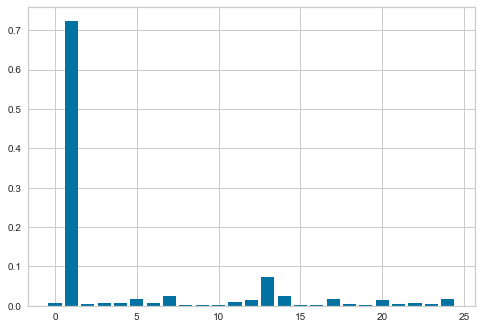

In [ ]:
importance = dtc.feature_importances_
var=[]
imp=[]
for i,v in enumerate(importance):
    print(X_train.columns[int(i)],"- ",v)
    
    var.append(str(X_train.columns[int(i)]))
    imp.append(v)
    
importancedf = {
    'var': var,
    'val': imp
}

feature_importance = pd.DataFrame(importancedf)

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
feature_importance.sort_values(by=['val'], ascending=False)

,var,val
1,amt,0.723109
13,category_2,0.074141
14,category_3,0.026019
7,age,0.024313
5,city_pop,0.017441
24,category_13,0.016548
17,category_6,0.016125
12,category_1,0.013714
20,category_9,0.013543
11,dayofyear,0.010585


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print("Score the X-train with Y-train is : ", dtc.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test,Y_test))

Y_pred=dtc.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.9990892202386659
 Mean absolute error is  0.0009107797613340979
 Mean squared  error is  0.0009107797613340979
 Median absolute error is  0.0
Accuracy score  0.9990892202386659
F1 score:  99.91 %


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [ ]:
print("Score the X-train with Y-train is : ", dtc.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test,Y_test))

Y_pred=dtc.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.9998365607791199
Score the X-test  with Y-test  is :  0.9991045958652227
 Mean absolute error is  0.0008954041347773158
 Mean squared  error is  0.0008954041347773158
 Median absolute error is  0.0
Accuracy score  0.9991045958652227
F1 score:  99.91 %


In [ ]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[276179      0]
 [   495 276149]]
Outcome values : 
 276179 0 495 276149
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    276179
           0       1.00      1.00      1.00    276644

    accuracy                           1.00    552823
   macro avg       1.00      1.00      1.00    552823
weighted avg       1.00      1.00      1.00    552823

